In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../python')
import dataPython as dp

In [2]:
dat_import = dp.getXYZdata('rotmod.dat')
r = dat_import['xx']
v_file = dat_import['zz']

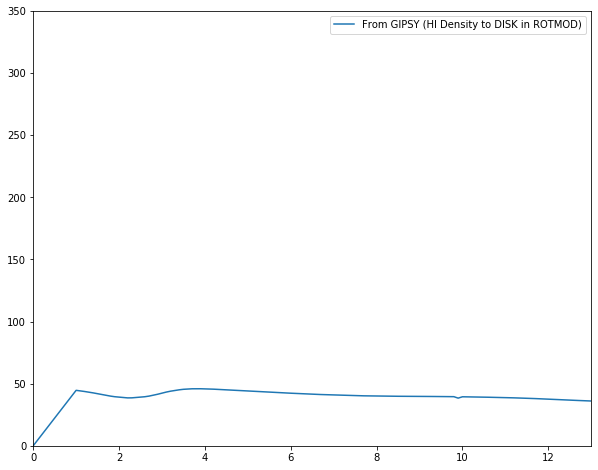

In [3]:
plt.figure(figsize=(10,8))

plt.plot(r,v_file,label='From GIPSY (HI Density to DISK in ROTMOD)')

plt.legend(loc='upper right')
plt.ylim([0,350])
plt.xlim([0,13])
plt.show()

![](https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/mnras/449/4/10.1093_mnras_stv568/1/m_stv568fig9.jpeg?Expires=1604630438&Signature=qaQKSoXjgjtc0nJoTMjvndA45P-7o79jVdgs6dkc49bH~8-sn7w5keJw0z38tCAXs3foOtiU684OHAnkOc4KYs~5AhL-~BlMAm67qwbBPm8e4XM6EADdyeX1vuoygyzU4DfFeew-ZBZdI70rpvYVtrXmqw~sZbV6JYQWsBUayZERZC5dILXyjwv6fcXT8oN4h02RFjO85qxZ7e2Kstr51fkSCI5HDyqafr2B-RxZmaun8UUqHWdYpDeQp3jDit5enhR1ncZcwVgcOo3qF8UATTld5VjO1L7nCSvK39RFTop6F9v~Y1RavXPJW3AuPkjgbpdUZcPiLnpPALXMgJOKxg__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

Figure 9 ^

So it looks like I might've gotten the gas component, but as it turns out I followed the instructions incorrectly - I used the bulge component instead of the disk component

In [4]:
dat2_import = dp.getXYZdata('rotmod_gas.dat')
r2 = dat2_import['xx']
v2_file = dat2_import['zz']

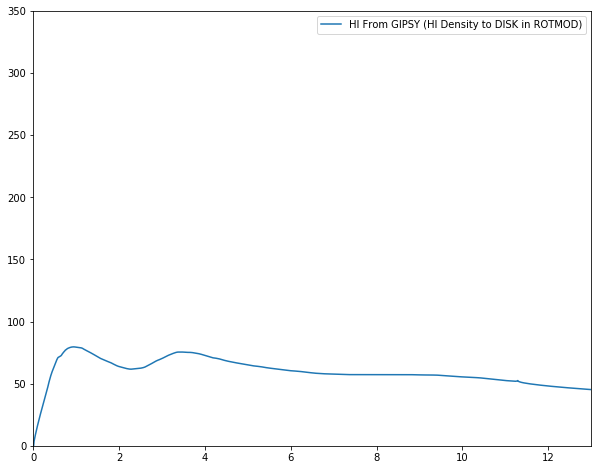

In [5]:
plt.figure(figsize=(10,8))

plt.plot(r2,v2_file,label='HI From GIPSY (HI Density to DISK in ROTMOD)')

plt.legend(loc='upper right')
plt.ylim([0,350])
plt.xlim([0,13])
plt.show()

![](https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/mnras/449/4/10.1093_mnras_stv568/1/m_stv568fig9.jpeg?Expires=1604630438&Signature=qaQKSoXjgjtc0nJoTMjvndA45P-7o79jVdgs6dkc49bH~8-sn7w5keJw0z38tCAXs3foOtiU684OHAnkOc4KYs~5AhL-~BlMAm67qwbBPm8e4XM6EADdyeX1vuoygyzU4DfFeew-ZBZdI70rpvYVtrXmqw~sZbV6JYQWsBUayZERZC5dILXyjwv6fcXT8oN4h02RFjO85qxZ7e2Kstr51fkSCI5HDyqafr2B-RxZmaun8UUqHWdYpDeQp3jDit5enhR1ncZcwVgcOo3qF8UATTld5VjO1L7nCSvK39RFTop6F9v~Y1RavXPJW3AuPkjgbpdUZcPiLnpPALXMgJOKxg__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

Figure 9 ^

So it looks like I might've gotten the gas component, but as it turns out I followed the instructions incorrectly - I used the bulge component instead of the disk component

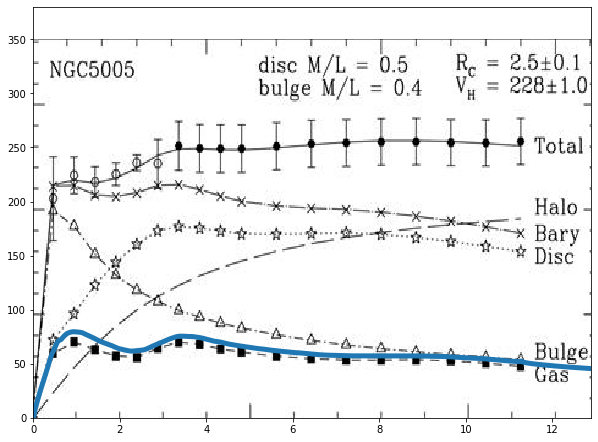

In [6]:
plt.figure(figsize=(10,8))

img=plt.imread("bg_crop.png")
plt.imshow(img,extent=[0,13,0,350],aspect=0.025)

plt.plot(r2,v2_file,label='HI From GIPSY (HI Density to DISK in ROTMOD)',linewidth=5)

#plt.legend(loc='upper right')
plt.ylim([0,380])
plt.xlim([0,12.9])
plt.show()

In [7]:
fromplot_import = dp.getXYdata('ngc5005_gas_data_points.txt')
r_fromplot = fromplot_import['xx']
v_fromplot = fromplot_import['yy']

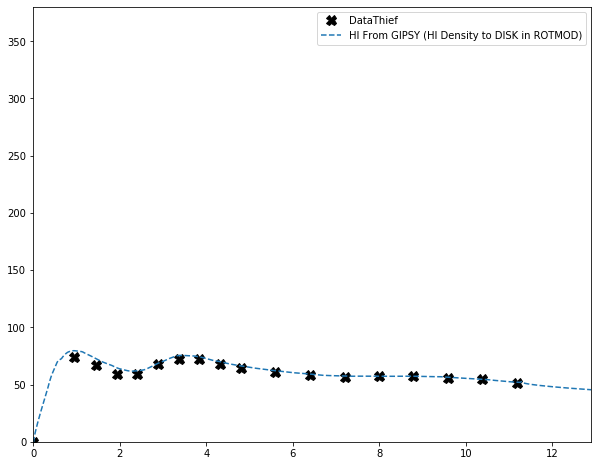

In [8]:
plt.figure(figsize=(10,8))

plt.plot(r_fromplot,v_fromplot,'X',color='black',markersize=10,label='DataThief')
plt.plot(r2,v2_file,'--',label='HI From GIPSY (HI Density to DISK in ROTMOD)')

plt.legend()
plt.ylim([0,380])
plt.xlim([0,12.9])
plt.show()

In [9]:
bfromplot_import = dp.getXYdata('../NGC_5005/traced_data/ngc5005_bulge.txt')
rb_fromplot = bfromplot_import['xx']
vb_fromplot = bfromplot_import['yy']

dfromplot_import = dp.getXYdata('../NGC_5005/traced_data/ngc5005_disk.txt')
rd_fromplot = dfromplot_import['xx']
vd_fromplot = dfromplot_import['yy']

b_import = dp.getXYZdata('rotmod_bulge.dat')
rb = b_import['xx']
vb = b_import['zz']

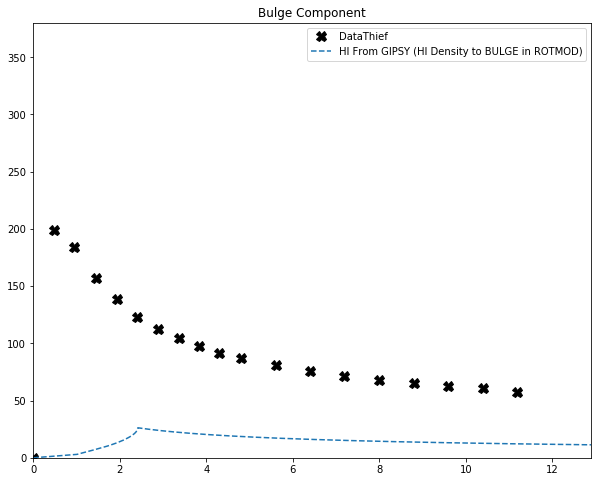

In [10]:
plt.figure(figsize=(10,8))

plt.title('Bulge Component')
plt.plot(rb_fromplot,vb_fromplot,'X',color='black',markersize=10,label='DataThief')
plt.plot(rb,vb,'--',label='HI From GIPSY (HI Density to BULGE in ROTMOD)')

plt.legend()
plt.ylim([0,380])
plt.xlim([0,12.9])
plt.show()

In [11]:
d_import = dp.getXYZdata('rotmod_disk.dat')
rd = d_import['xx']
vd = d_import['zz']

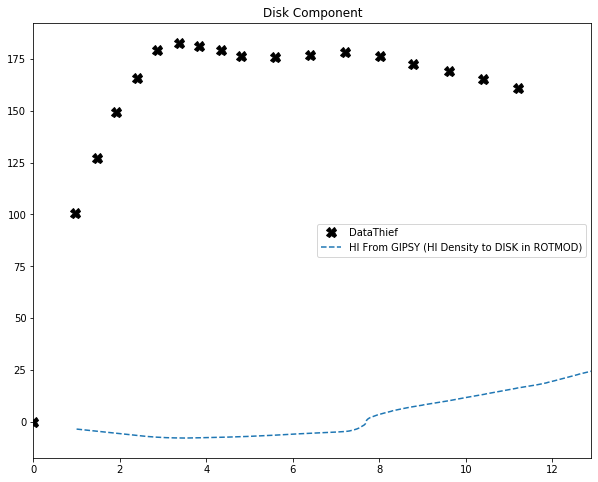

In [12]:
plt.figure(figsize=(10,8))

plt.title('Disk Component')
plt.plot(rd_fromplot,vd_fromplot,'X',color='black',markersize=10,label='DataThief')
plt.plot(rd,vd,'--',label='HI From GIPSY (HI Density to DISK in ROTMOD)')

plt.legend()
#plt.ylim([0,380])
plt.xlim([0,12.9])
plt.show()

# Scaling Comparison:

In [13]:
x5_import = dp.getXYZdata('rotmod_gas_x5.dat')
rx5 = x5_import['xx']
vx5_file = x5_import['zz']

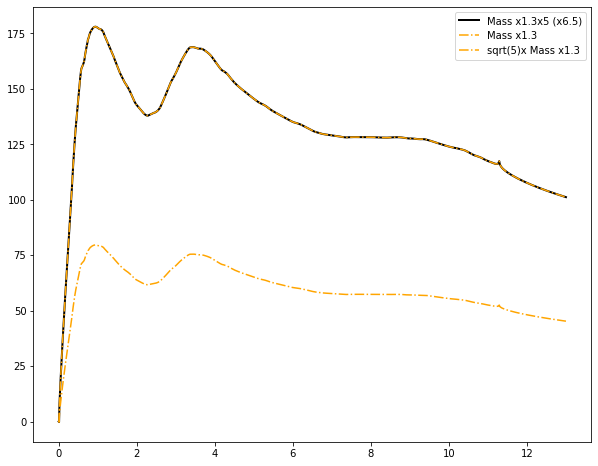

In [14]:
plt.figure(figsize=(10,8))

plt.plot(rx5,vx5_file,color='black',linewidth=2,label='Mass x1.3x5 (x6.5)')
plt.plot(r2,v2_file,'-.',color='orange',label='Mass x1.3')
plt.plot(r2,5**(1/2)*np.asarray(v2_file),'-.',color='orange',label='sqrt(5)x Mass x1.3')

plt.legend()
#plt.ylim([0,380])
#plt.xlim([0,12.9])
plt.show()

In [15]:
xb2_import = dp.getXYZdata('try3_adjust-dist.txt')
rb2 = xb2_import['xx']
vb2_file = xb2_import['zz']

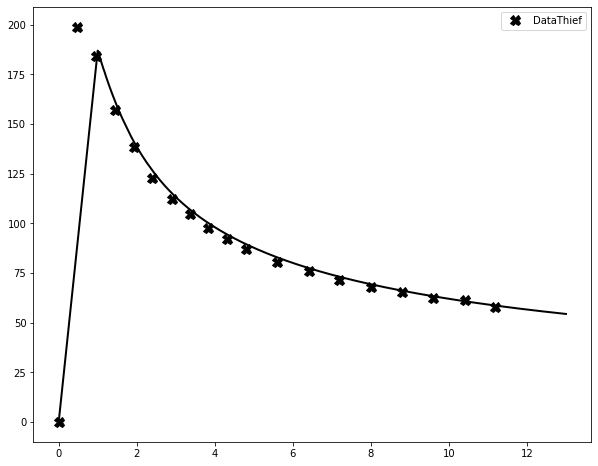

In [16]:
plt.figure(figsize=(10,8))

plt.plot(rb2,55*np.asarray(vb2_file),color='black',linewidth=2)
plt.plot(rb_fromplot,vb_fromplot,'X',color='black',markersize=10,label='DataThief')

plt.legend()
#plt.ylim([0,380])
#plt.xlim([0,12.9])
plt.show()

No handles with labels found to put in legend.


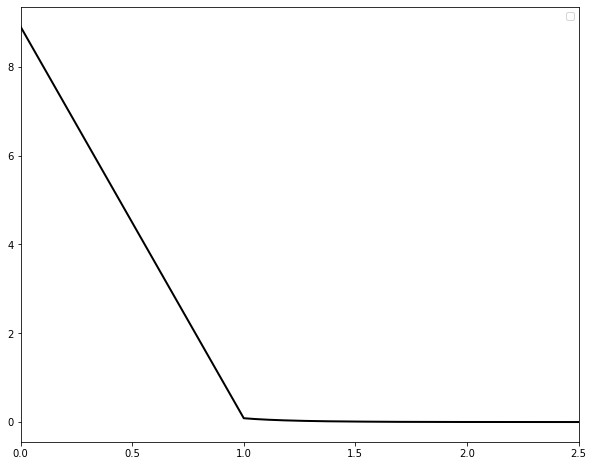

In [17]:
densb2 = xb2_import['yy']
plt.figure(figsize=(10,8))

plt.plot(rb2,densb2,color='black',linewidth=2)

plt.xlim([0,2.5])
plt.legend()
#plt.ylim([0,380])
#plt.xlim([0,12.9])
plt.show()

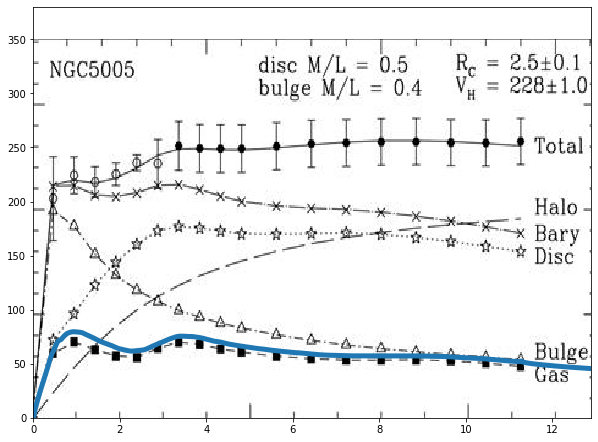

In [18]:
dat_import_corrected = dp.getXYZdata('gas_correct_z0.txt')
r = dat_import['xx']
v_file = dat_import['zz']

plt.figure(figsize=(10,8))

img=plt.imread("bg_crop.png")
plt.imshow(img,extent=[0,13,0,350],aspect=0.025)

plt.plot(r2,v2_file,label='HI From GIPSY (HI Density to DISK in ROTMOD)',linewidth=5)

#plt.legend(loc='upper right')
plt.ylim([0,380])
plt.xlim([0,12.9])
plt.show()

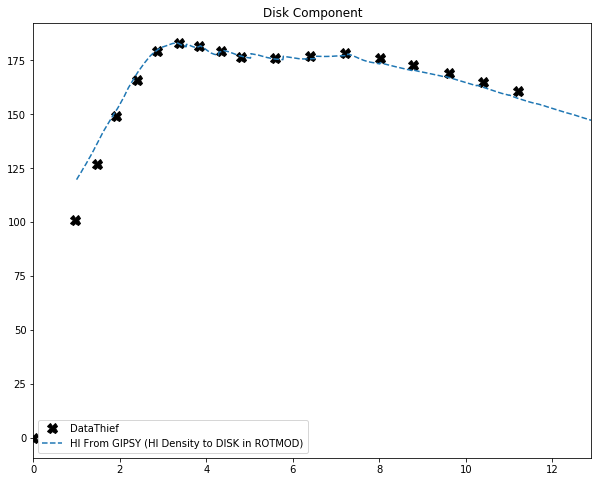

In [32]:
d_import = dp.getXYZdata('disk_change-dist.dat')
rd = d_import['xx']
vd = d_import['zz']

plt.figure(figsize=(10,8))

plt.title('Disk Component')
plt.plot(rd_fromplot,vd_fromplot,'X',color='black',markersize=10,label='DataThief')
plt.plot(rd,3.8*np.asarray(vd),'--',label='HI From GIPSY (HI Density to DISK in ROTMOD)')

plt.legend()
plt.xlim([0,12.9])
plt.show()